In [22]:
def is_rotationally_symmetric(board, n):
    # Rotate the board 90 degrees clockwise and check if it matches the original
    for i in range(n):
        for j in range(n):
            if board[i][j] != board[n-j-1][i]:
                return False
    return True

def solve_n_queens(n):
    def solve(rows, diagonals, anti_diagonals, path):
        row = len(path)
        if row == n:
            solutions.append(path.copy())
            return
        for col in range(n):
            if col in rows or (row-col) in diagonals or (row+col) in anti_diagonals:
                continue
            rows.add(col)
            diagonals.add(row-col)
            anti_diagonals.add(row+col)
            path.append(col)
            solve(rows, diagonals, anti_diagonals, path)
            rows.remove(col)
            diagonals.remove(row-col)
            anti_diagonals.remove(row+col)
            path.pop()

    solutions = []
    solve(set(), set(), set(), [])
    return solutions

def count_rotationally_symmetric_solutions(n):
    solutions = solve_n_queens(n)
    count = 0
    for solution in solutions:
        board = [['.' for _ in range(n)] for _ in range(n)]
        for row, col in enumerate(solution):
            board[row][col] = 'Q'
        if is_rotationally_symmetric(board, n):
            for row in board:
                print(row)
            print("\n")
            count += 1
            
    return len(solutions), count

n = 5
total_solutions, rotationally_symmetric_solutions = count_rotationally_symmetric_solutions(n)
total_solutions, rotationally_symmetric_solutions

['.', 'Q', '.', '.', '.']
['.', '.', '.', '.', 'Q']
['.', '.', 'Q', '.', '.']
['Q', '.', '.', '.', '.']
['.', '.', '.', 'Q', '.']


['.', '.', '.', 'Q', '.']
['Q', '.', '.', '.', '.']
['.', '.', 'Q', '.', '.']
['.', '.', '.', '.', 'Q']
['.', 'Q', '.', '.', '.']




(10, 2)

In [23]:
# for n in range(4,15):
#     print("-"*100)
#     print(n)
#     print(count_rotationally_symmetric_solutions(n))

In [24]:
# class NQueen_rot90sym:
#     def __init__(self, N):
#         self.N = N
#         self.count = 0
#         self.board = [[0] * N for _ in range(N)]
    
#     def solve(self, row=0, cols=set(), diags=set(), anti_diags=set()):
#         if row == self.N:
#             self.count += int(self._is_rot90_sym())
#             return
        
#         for col in range(self.N):
#             if col in cols or col-row in diags or col+row in anti_diags: continue
#             cols.add(col)
#             diags.add(col-row)
#             anti_diags.add(col+row)
#             self.board[row][col] = 1
            
#             self.solve(row+1, cols, diags, anti_diags)
            
#             self.board[row][col] = 0
#             cols.remove(col)
#             diags.remove(col-row)
#             anti_diags.remove(col+row)
    
    
#     def _is_rot90_sym(self):
#         for i in range(self.N):
#             for j in range(self.N):
#                 if not self.board[i][j] == self.board[j][self.N-1-i]: return False
                
#         return True

In [25]:
# for N in range(1, 12+1):
#     solver = NQueen_rot90sym(N)
#     solver.solve()
#     print("-"*100)
#     print(N)
#     print(solver.count)

### More efficient

In [26]:
# from sympy import factorint

# def add_to_sets(n, row,col,rows,cols,diags,anti_diags):
#     _rows = [row, col, n-1-row, n-1-col]
#     _cols = [col, n-1-row, n-1-col, row]
    
#     for i,j in zip(_rows,_cols):
#         if i in rows or j in cols or j-i in diags or j+i in anti_diags: return True # overlap is true
#         rows.add(i)
#         cols.add(j)
#         diags.add(j-i)
#         anti_diags.add(j+i)
#     return False # overlap is false

# def remove_from_sets(n, row,col,rows,cols,diags,anti_diags):
#     _rows = [row, col, n-1-row, n-1-col]
#     _cols = [col, n-1-row, n-1-col, row]
#     for i,j in zip(_rows, _cols):
#         if i in rows: rows.remove(i)
#         if j in cols: cols.remove(j)
#         if j-i in diags: diags.remove(j-i)
#         if j+i in anti_diags: anti_diags.remove(j+i)
    
# # Only works directly for even boards atm, as for odd boards we always have a single queen in the center
# def solve_symmetric_nqueen(n, num_placed=0, row=0, rows=set(), cols=set(), diags=set(), anti_diags=set()):
#     if num_placed == n:
#         return 1
    
#     result = 0
#     if row in rows:
#         return solve_symmetric_nqueen(n, num_placed, row+1, rows, cols, diags, anti_diags)
    
#     for col in range(n):
#         if col in cols or (col - row) in diags or (col + row) in anti_diags: continue
#         overlap = add_to_sets(n, row,col,rows,cols,diags,anti_diags)
#         if not overlap:
#             result += solve_symmetric_nqueen(n, num_placed+4, row+1, rows, cols, diags, anti_diags)
        
#         remove_from_sets(n, row,col,rows,cols,diags,anti_diags)
    
#     return result

# for N in range(1, 32+1):
#     print("-"*100)
#     print(N)
#     if N%2 == 0:
#         result = solve_symmetric_nqueen(N)
#     else:
#         result = solve_symmetric_nqueen(N,1,0,set([(N-1)//2]),set([(N-1)//2]),set([0]),set([N-1]))
        
        
#     print(result)
#     factors = factorint(result)
#     print([v for row in [[factor]*power for (factor, power) in factors.items()] for v in row])

Note the regularity in the gaps for $N \geq 12$

Note the huge number of 2's in the prime factorization

Note how other than all the 2's there's only very few primes

### More efficient + correctness + nice plotter

In [27]:
from sympy import factorint

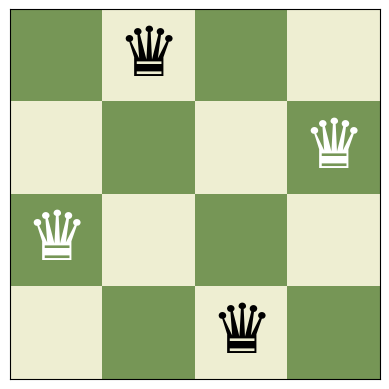

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_chess_board(matrix, fontsize=50):
    n = matrix.shape[0]
    # Create a chess board (n x n) pattern
    board = np.zeros_like(matrix)
    board[1::2, ::2] = 1
    board[::2, 1::2] = 1
    
    cmap = ListedColormap(['#769656', '#eeeed2'])
    fig, ax = plt.subplots()
    ax.imshow(board, cmap=cmap, interpolation='nearest')
    
    # Place queens based on matrix
    for i in range(n):
        for j in range(n):
            if matrix[i, j] == 1:
                ax.text(j, i, '♛', fontsize=fontsize, ha='center', va='center', color='black' if board[i, j] else 'white')
    
    # Hide the axes
    ax.set_xticks([])
    ax.set_yticks([])

# Example binary matrix
matrix = np.array([[0, 1, 0, 0],
                   [0, 0, 0, 1],
                   [1, 0, 0, 0],
                   [0, 0, 1, 0]])

plot_chess_board(matrix)

In [29]:
factorial = lambda n: 1 if n <= 1 else n*factorial(n-1)
factorial(5)

120

In [30]:
# 0 <= num <= N! - 1
def decimal2factoradic(N, num):
    factoradic = []
    for i in range(1,N+1):
        factoradic.append(num%i)
        num //= i
    return list(reversed(factoradic))

decimal2factoradic(4, 4)

[0, 2, 0, 0]

In [31]:
def factoradic2permutation(factoriadic):
    N = len(factoriadic)
    elements = list(range(1,N+1))
    
    permutation = []
    for idx in factoriadic:
        permutation.append(elements.pop(idx))
        
    return permutation

factoradic2permutation([0,2,0,0])

[1, 4, 2, 3]

In [32]:
# Can be sped up to N*ln(N)
def permutation2factoradic(permutation):
    factoriadic = []
    N = len(permutation)
    for i in range(N):
        lt_i = 0
        for j in range(i+1,N):
            lt_i += int(permutation[j] < permutation[i])
        factoriadic.append(lt_i)
    
    return factoriadic

permutation2factoradic([1,4,2,3])

[0, 2, 0, 0]

In [33]:
def factoradic2decimal(factoriadic):
    N = len(factoriadic)
    dec = 0
    for i in reversed(range(N)):
        dec += factoriadic[i] * factorial(N-1-i)
        
    return dec

factoradic2decimal([0,2,0,0])

4

In [34]:
def board2permutation(board):
    N = len(board)
    perm = []
    for i in range(N):
        for j in range(N):
            if board[i][j]: perm.append(j+1)
                
    return perm

board2permutation([[0,1,0,0],
                   [0,0,0,1],
                   [1,0,0,0],
                   [0,0,1,0]])

[2, 4, 1, 3]

In [35]:
def permutation2board(perm):
    N = len(perm)
    board = [[0] * N for _ in range(N)]
    
    for i in range(N):
        board[i][perm[i]-1] = 1
        
    return board

permutation2board([2,4,1,3])

[[0, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 1, 0]]

In [36]:
class NQueen_sym90:
    def __init__(self, N):
        self.N = N
        self.solutions = set()
        self.board = [[0]*N for _ in range(N)]

    def solve_symmetric_nqueen(self, num_placed=0, row=0, rows=set(), cols=set(), diags=set(), anti_diags=set()):
        if num_placed == self.N:
            return self.solutions.add(factoradic2decimal(permutation2factoradic(board2permutation(self.board))))

        if row in rows:
            return self.solve_symmetric_nqueen(num_placed, row+1, rows, cols, diags, anti_diags)

        for col in range(self.N):
            if col in cols or (col - row) in diags or (col + row) in anti_diags: continue
            overlap = self._add_to_sets(row,col,rows,cols,diags,anti_diags)
            self._add_to_board(row,col)
            
            if not overlap:
                self.solve_symmetric_nqueen(num_placed+4, row+1, rows, cols, diags, anti_diags)

            self._remove_from_board(row,col)
            self._remove_from_sets(row,col,rows,cols,diags,anti_diags)
            
    def _add_to_sets(self, row, col, rows, cols, diags, anti_diags):
        _rows = [row, col, self.N-1-row, self.N-1-col]
        _cols = [col, self.N-1-row, self.N-1-col, row]

        for i,j in zip(_rows,_cols):
            if i in rows or j in cols or j-i in diags or j+i in anti_diags: return True # overlap is true
            rows.add(i)
            cols.add(j)
            diags.add(j-i)
            anti_diags.add(j+i)
        return False # overlap is false

    def _remove_from_sets(self, row, col, rows, cols, diags, anti_diags):
        _rows = [row, col, self.N-1-row, self.N-1-col]
        _cols = [col, self.N-1-row, self.N-1-col, row]
        for i,j in zip(_rows, _cols):
            if i in rows: rows.remove(i)
            if j in cols: cols.remove(j)
            if j-i in diags: diags.remove(j-i)
            if j+i in anti_diags: anti_diags.remove(j+i)

    def _add_to_board(self, row, col):
        _rows = [row, col, self.N-1-row, self.N-1-col]
        _cols = [col, self.N-1-row, self.N-1-col, row]
        for i,j in zip(_rows, _cols):
            self.board[i][j] = 1
            
    def _remove_from_board(self, row, col):
        _rows = [row, col, self.N-1-row, self.N-1-col]
        _cols = [col, self.N-1-row, self.N-1-col, row]
        for i,j in zip(_rows, _cols):
            self.board[i][j] = 0
            

for N in range(1, 28+1):
    print("-"*100)
    print(N)
    solver = NQueen_sym90(N)
    if N%2 == 0:
        solver.solve_symmetric_nqueen()
    else:
        solver.board[N//2][N//2] = 1
        solver.solve_symmetric_nqueen(1,0,set([(N-1)//2]),set([(N-1)//2]),set([0]),set([N-1]))
    result = len(solver.solutions)
        
    print(result)
    factors = factorint(result)
    print([v for row in [[factor]*power for (factor, power) in factors.items()] for v in row])

----------------------------------------------------------------------------------------------------
1
1
[]
----------------------------------------------------------------------------------------------------
2
0
[0]
----------------------------------------------------------------------------------------------------
3
0
[0]
----------------------------------------------------------------------------------------------------
4
2
[2]
----------------------------------------------------------------------------------------------------
5
2
[2]
----------------------------------------------------------------------------------------------------
6
0
[0]
----------------------------------------------------------------------------------------------------
7
0
[0]
----------------------------------------------------------------------------------------------------
8
0
[0]
----------------------------------------------------------------------------------------------------
9
0
[0]
--------------------

### Density plot

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

In [38]:
def get_distribution(N):
    distribution = [[0] * N for _ in range(N)]
    solver = NQueen_sym90(N)
    if N%2 == 0:
        solver.solve_symmetric_nqueen()
    else:
        solver.board[N//2][N//2] = 1
        solver.solve_symmetric_nqueen(1,0,set([(N-1)//2]),set([(N-1)//2]),set([0]),set([N-1]))

    print(len(solver.solutions))
    for num in solver.solutions:
        sol = permutation2board(factoradic2permutation(decimal2factoradic(N, num)))
        for i in range(N):
            for j in range(N):
                distribution[i][j] += sol[i][j]
                
    return distribution

In [39]:
N = 28
matrix = np.asarray(get_distribution(N))

# Create x, y, z positions for Plotly
xpos, ypos = np.meshgrid(range(N), range(N), indexing="ij")
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = matrix.flatten()

fig = go.Figure(data=[go.Scatter3d(x=xpos, y=ypos, z=zpos,
                                   mode='markers',
                                   marker=dict(size=12, color=zpos, colorscale='Viridis', opacity=0.8))])

fig.update_layout(scene=dict(
                    xaxis=dict(title='X Axis'),
                    yaxis=dict(title='Y Axis'),
                    zaxis=dict(title='Frequency')),
                  title='3D Histogram of a NxN Matrix',
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()

32896


In [40]:
N = 12
solver = NQueen_sym90(N)
solver.solve_symmetric_nqueen()

for num in solver.solutions:
    board = permutation2board(factoradic2permutation(decimal2factoradic(N, num)))
    for row in board:
        print(row)
    print("\n")

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

8


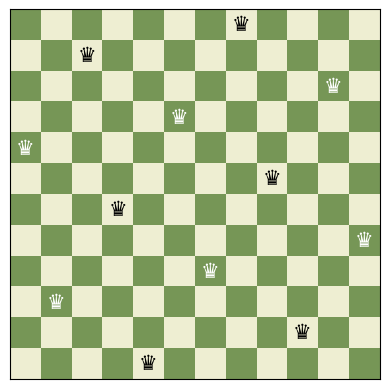

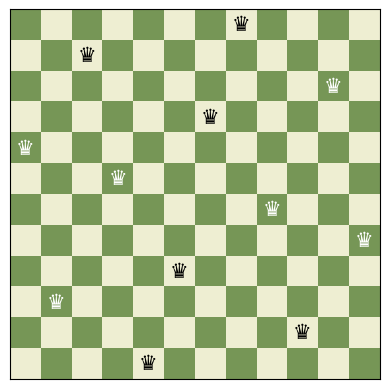

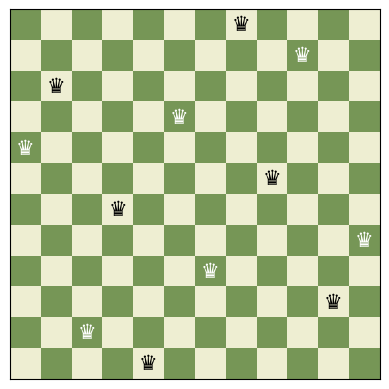

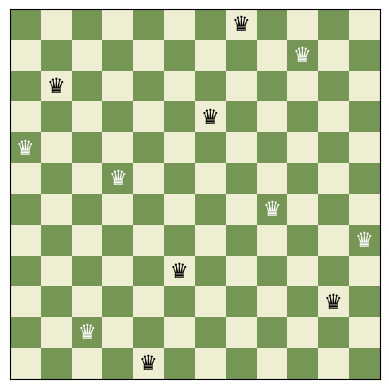

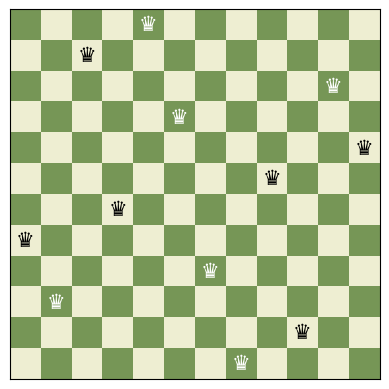

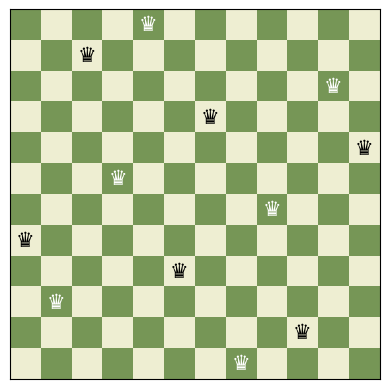

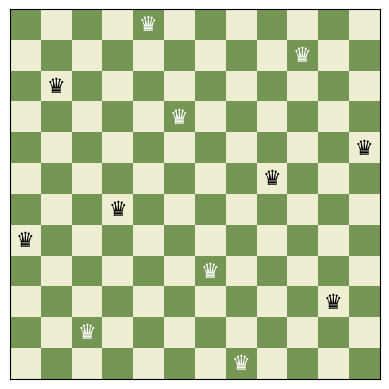

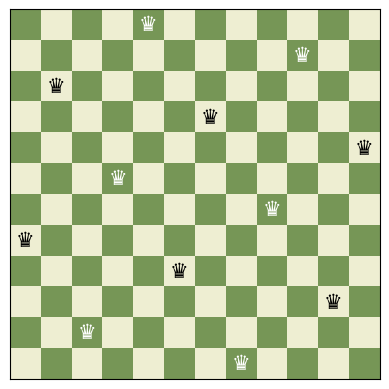

In [48]:
N = 12
solver = NQueen_sym90(N)
solver.solve_symmetric_nqueen()

print(len(solver.solutions))
for num in solver.solutions:
    board = permutation2board(factoradic2permutation(decimal2factoradic(N, num)))
    plot_chess_board(np.asarray(board), fontsize=15)

64


C:\Users\Hugo\AppData\Local\Temp\ipykernel_4248\2169737698.py:13: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



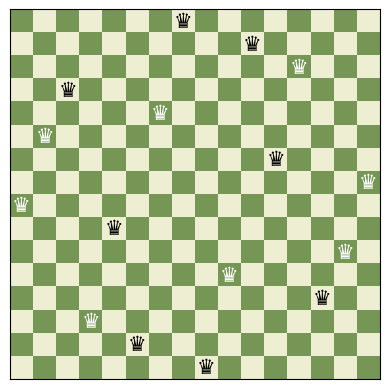

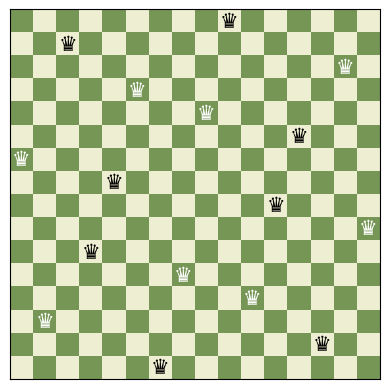

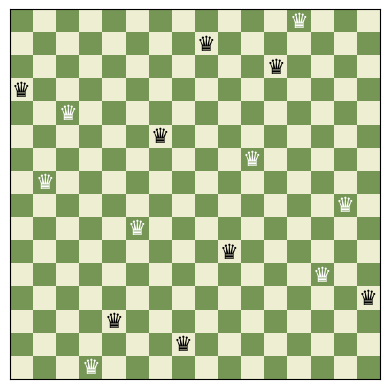

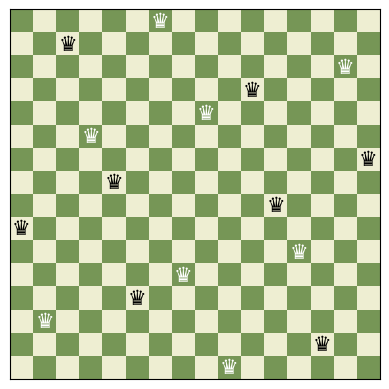

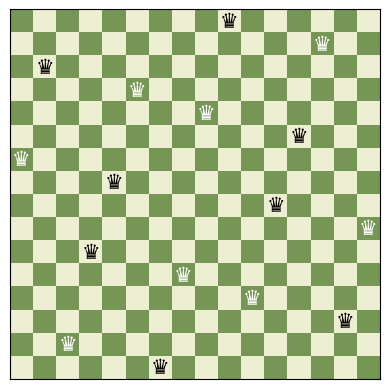

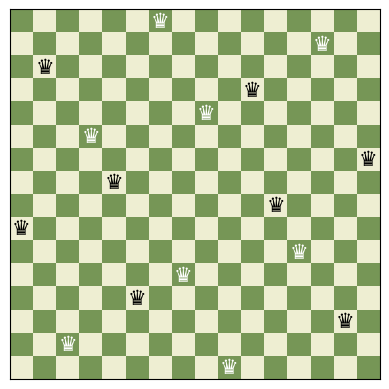

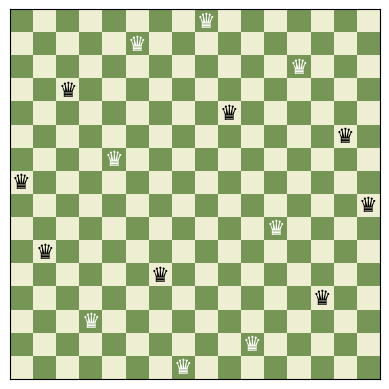

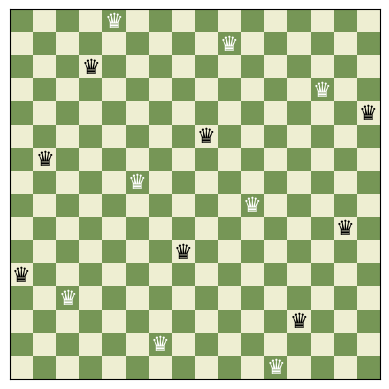

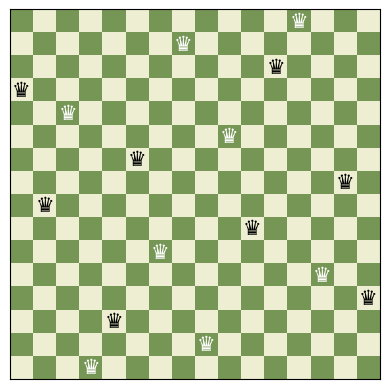

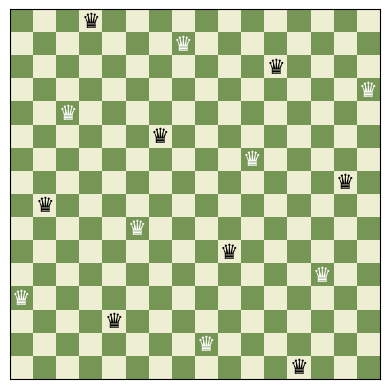

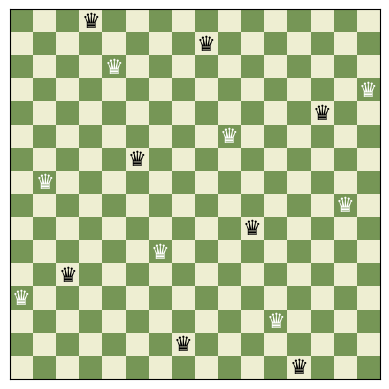

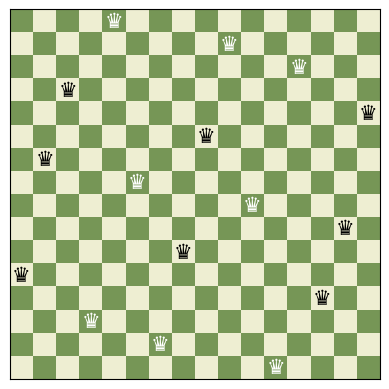

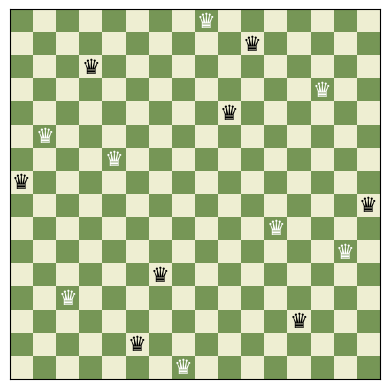

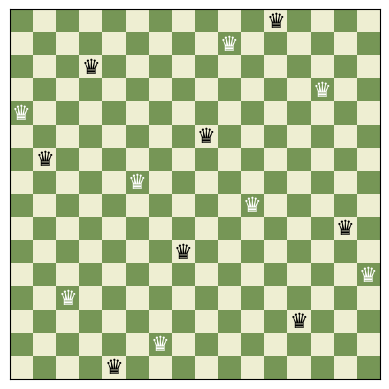

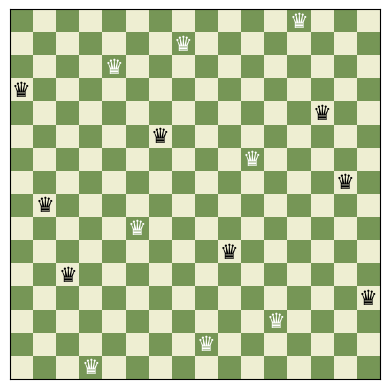

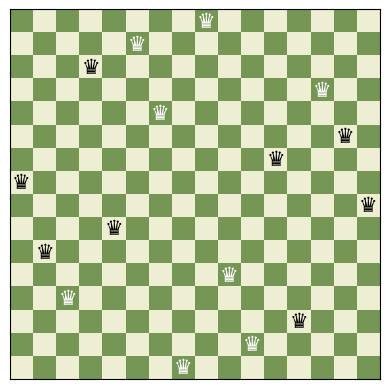

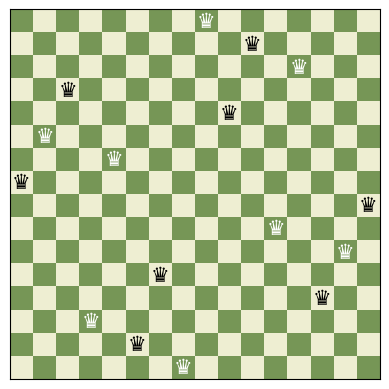

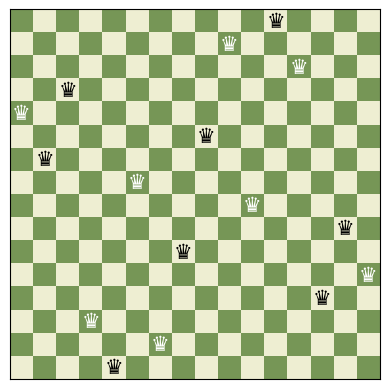

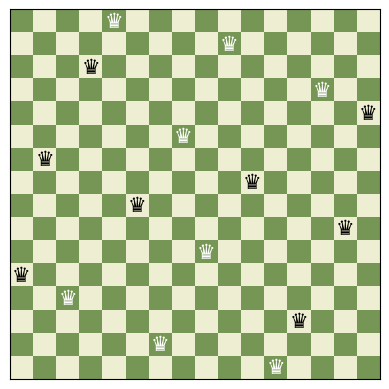

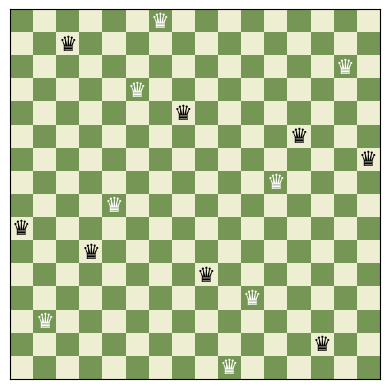

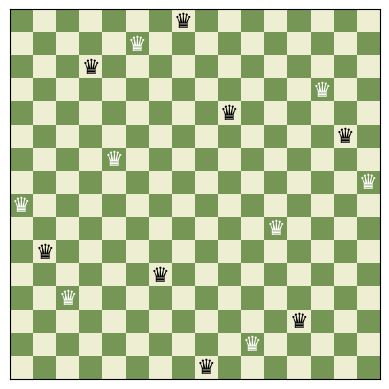

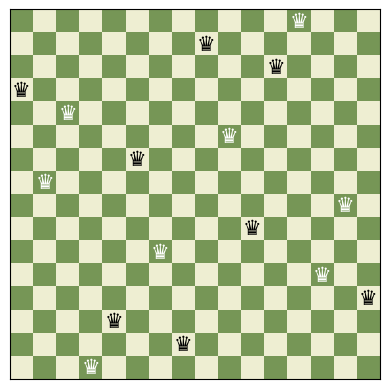

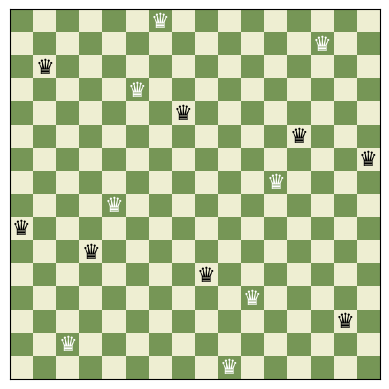

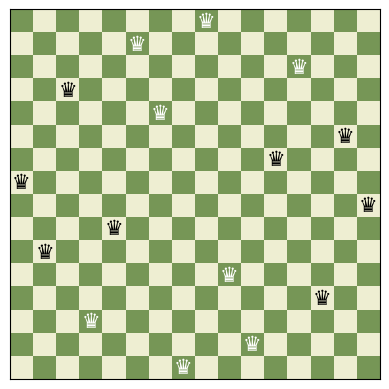

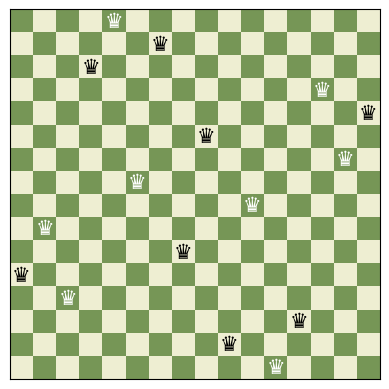

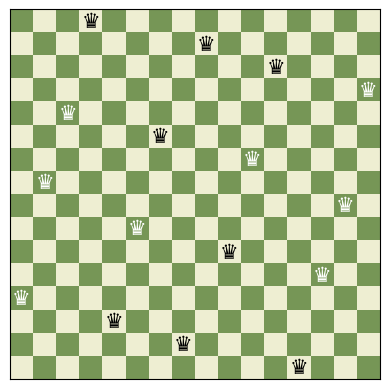

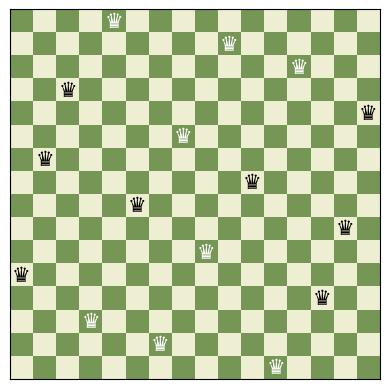

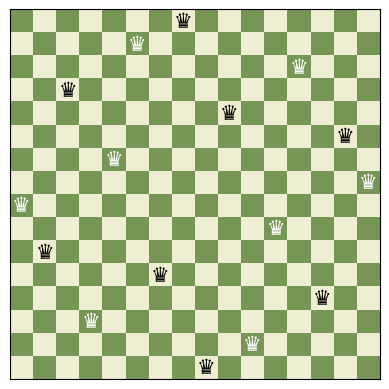

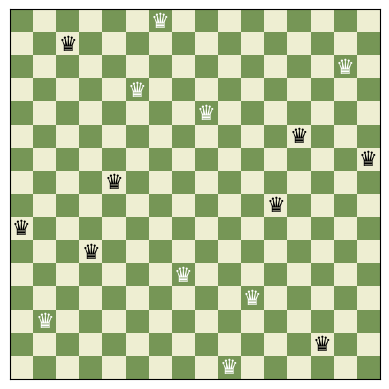

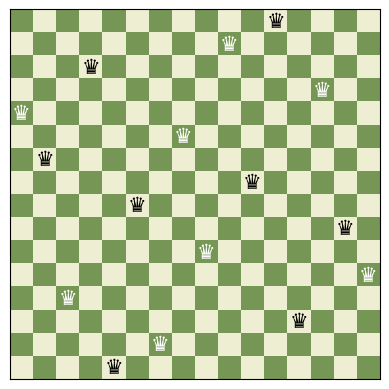

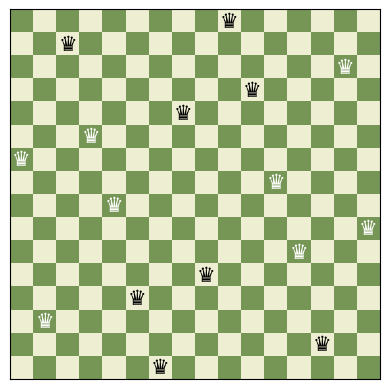

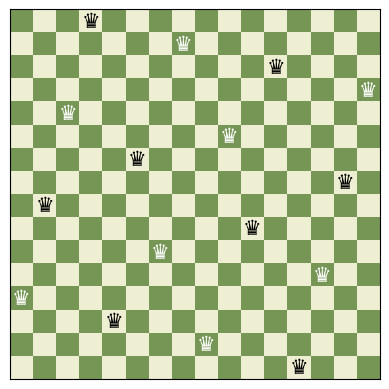

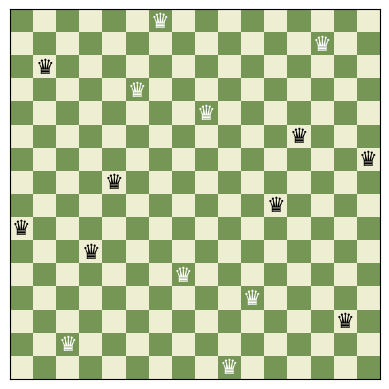

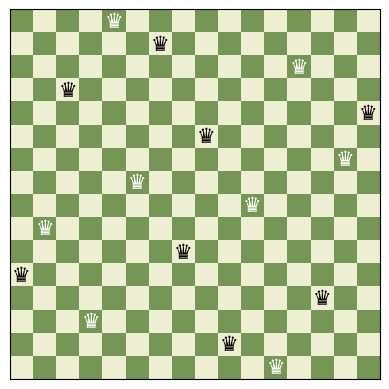

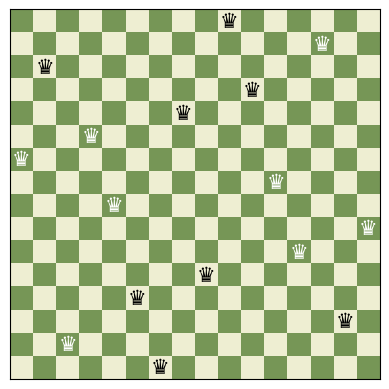

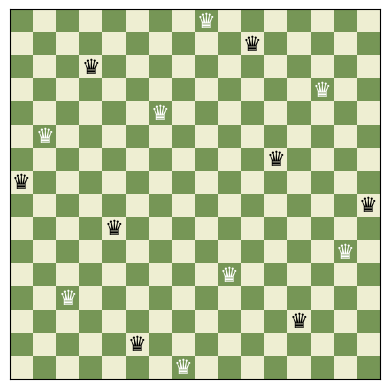

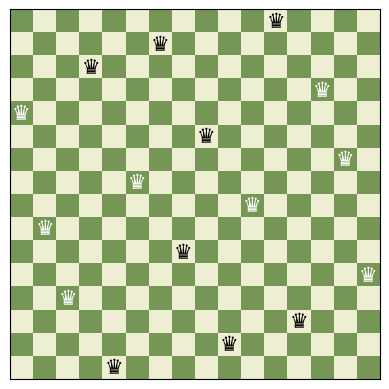

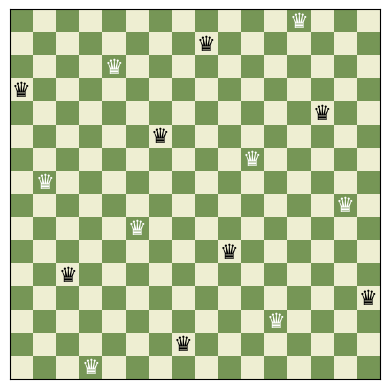

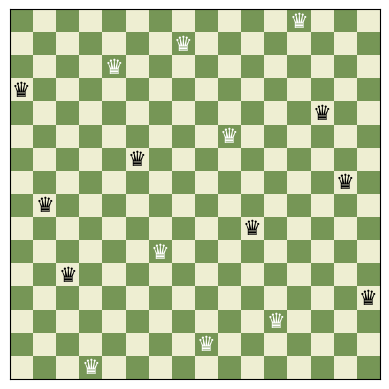

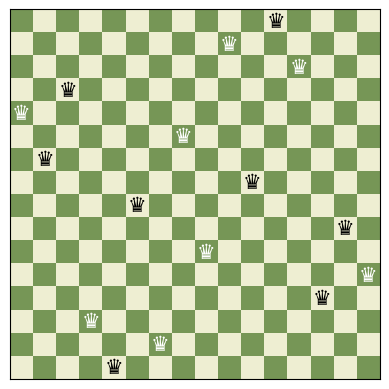

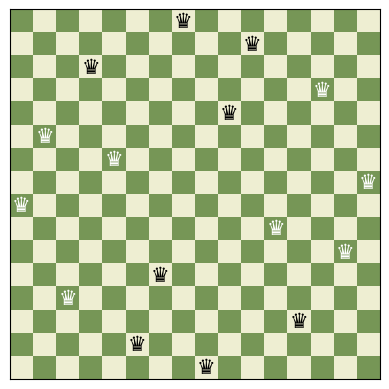

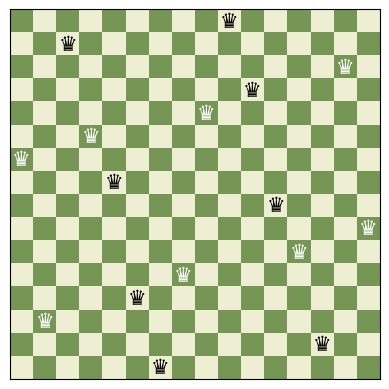

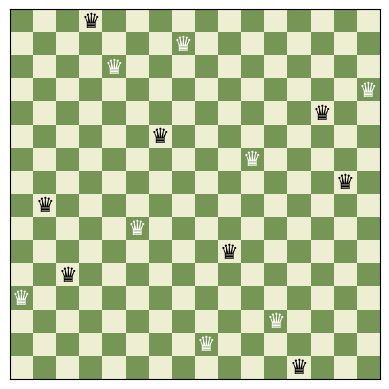

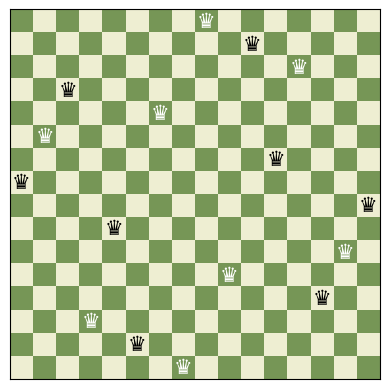

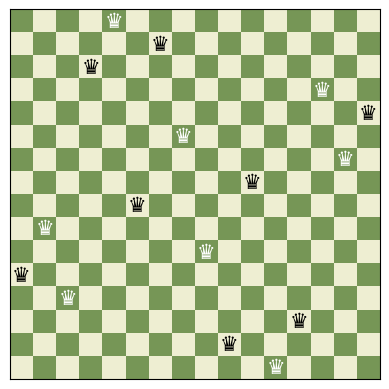

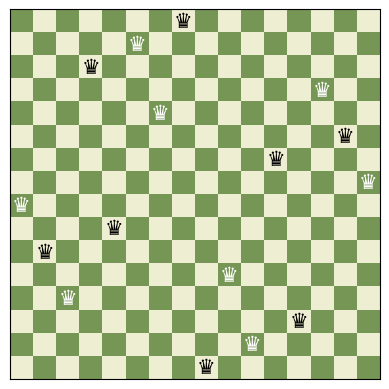

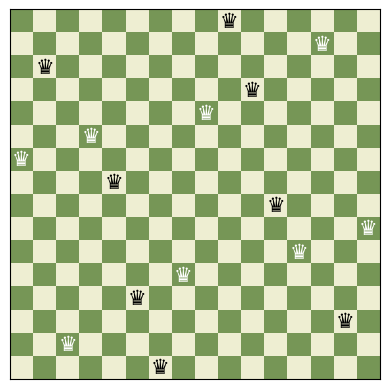

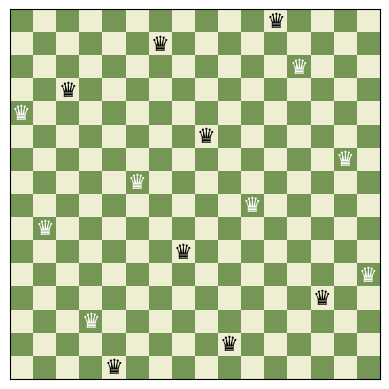

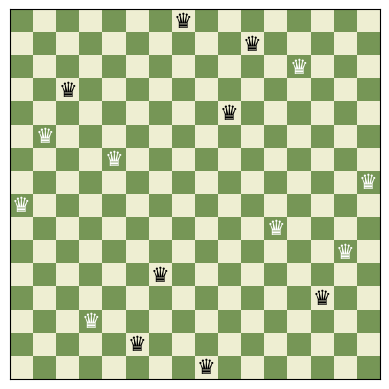

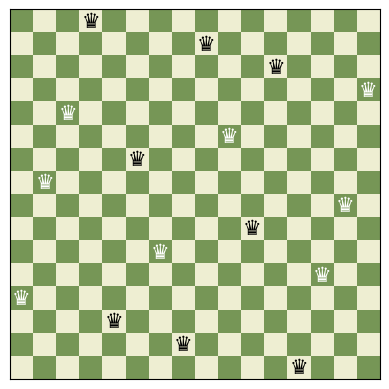

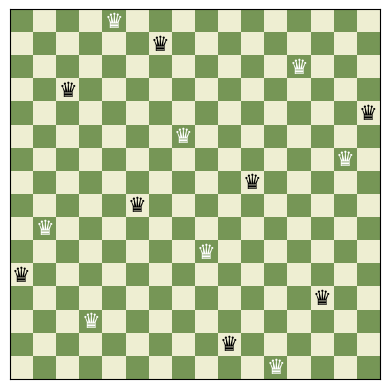

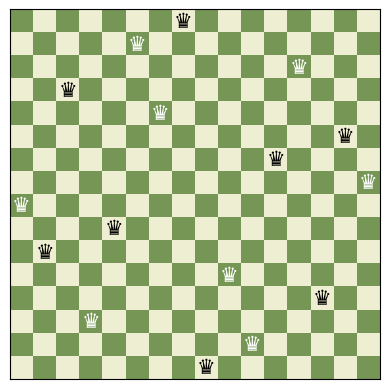

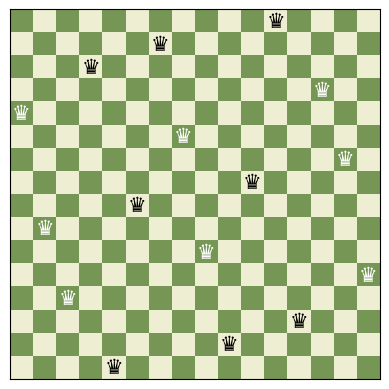

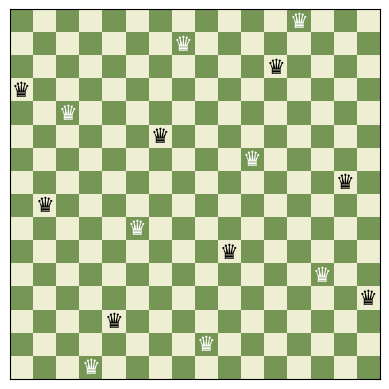

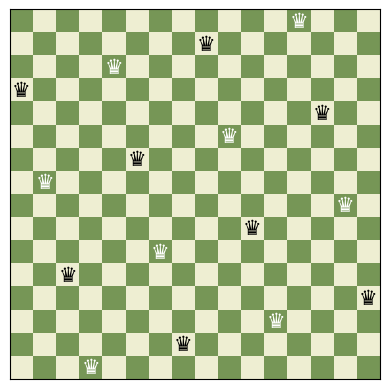

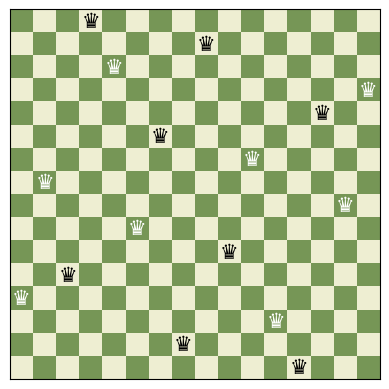

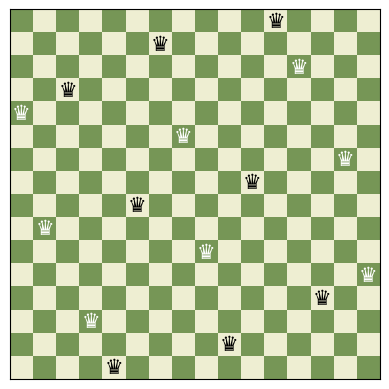

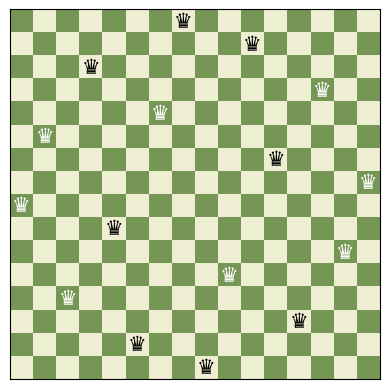

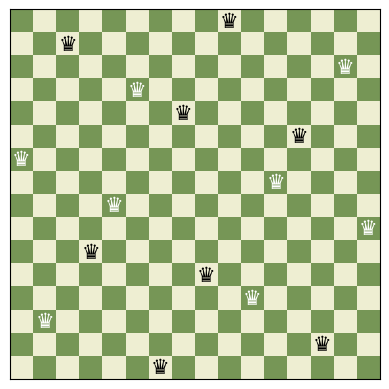

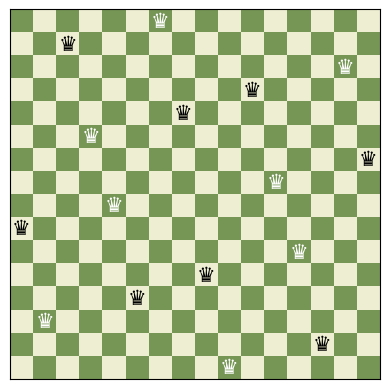

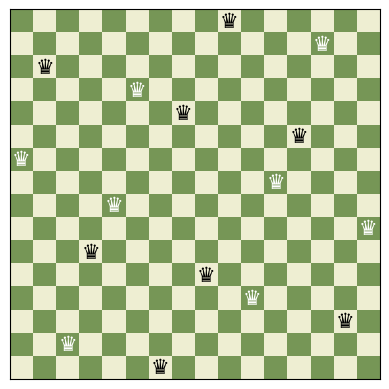

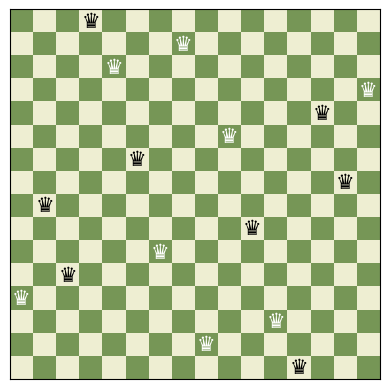

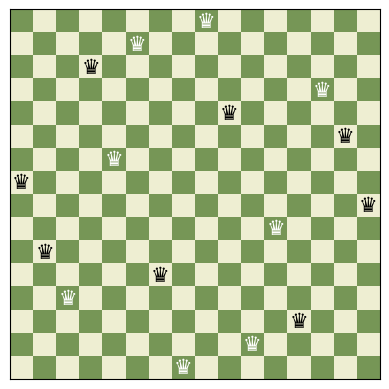

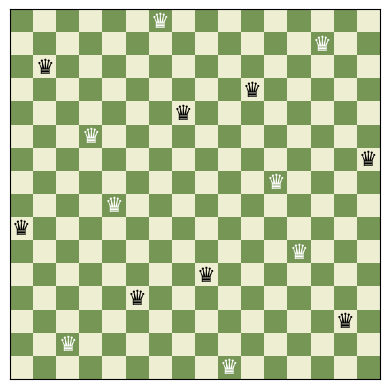

In [49]:
N = 16
solver = NQueen_sym90(N)
solver.solve_symmetric_nqueen()

print(len(solver.solutions))
for num in solver.solutions:
    board = permutation2board(factoradic2permutation(decimal2factoradic(N, num)))
    plot_chess_board(np.asarray(board), fontsize=15)

480


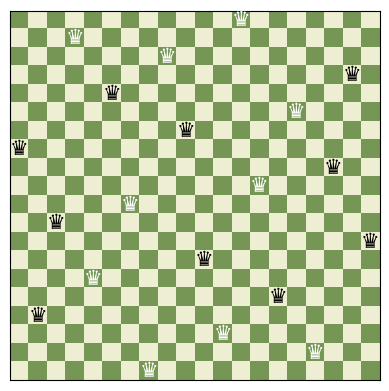

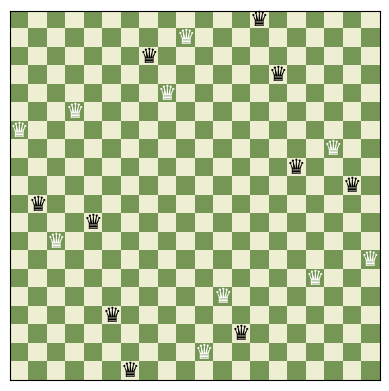

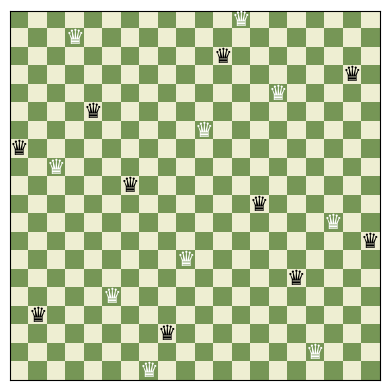

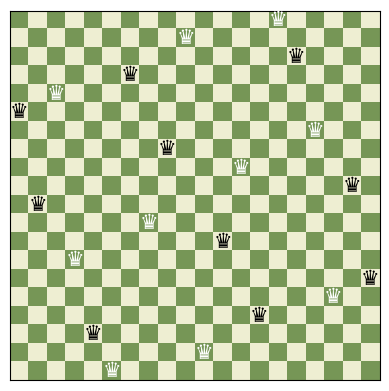

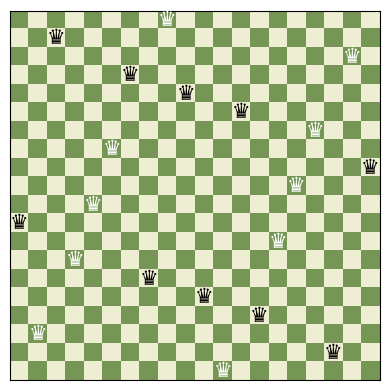

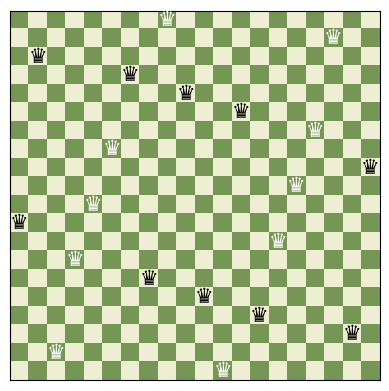

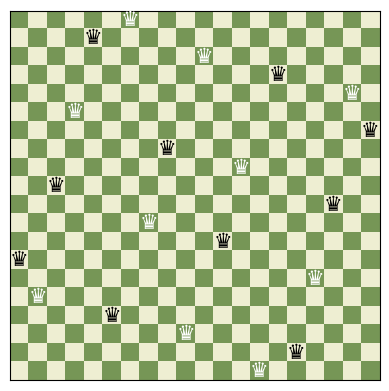

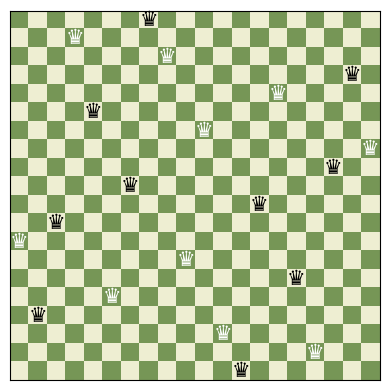

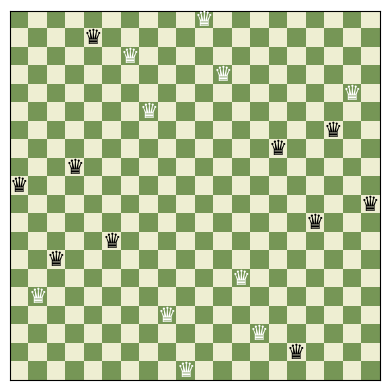

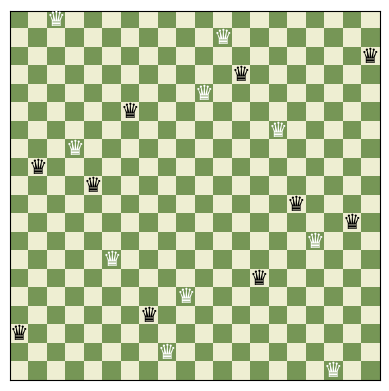

In [51]:
N = 20
solver = NQueen_sym90(N)
solver.solve_symmetric_nqueen()

print(len(solver.solutions))
for num in list(solver.solutions)[:10]:
    board = permutation2board(factoradic2permutation(decimal2factoradic(N, num)))
    plot_chess_board(np.asarray(board), fontsize=15)

3328


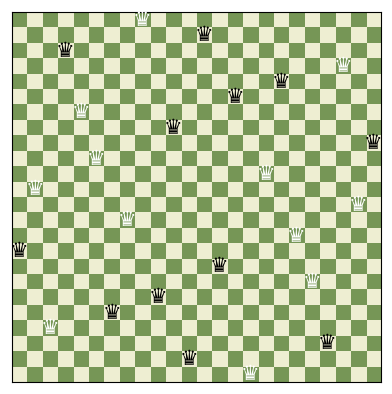

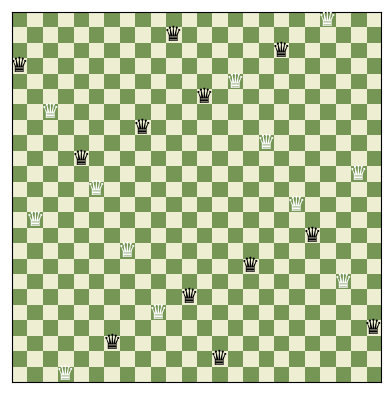

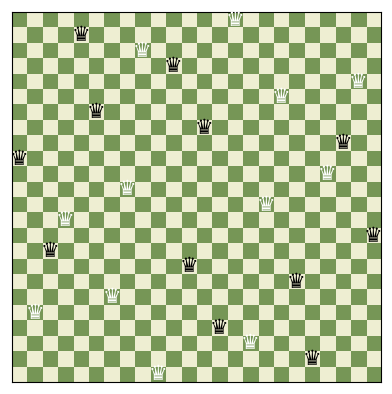

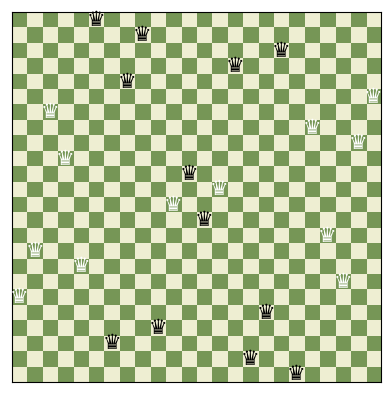

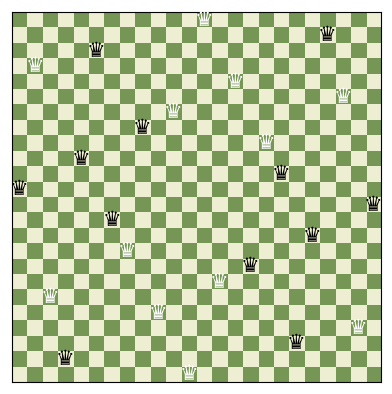

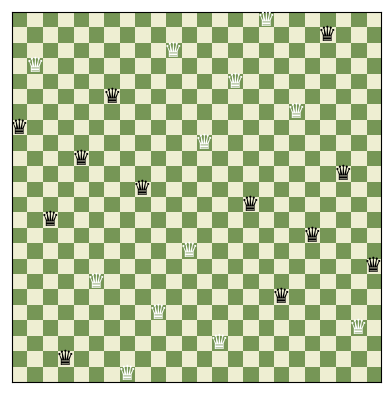

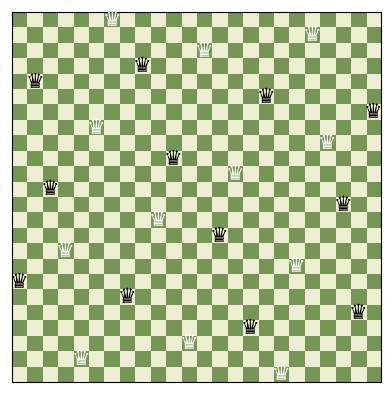

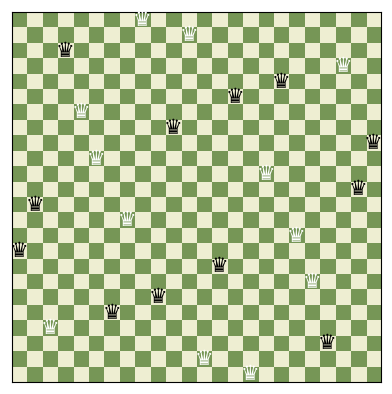

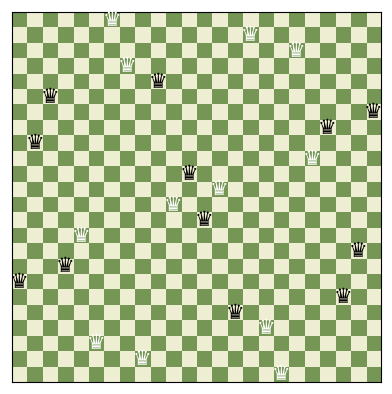

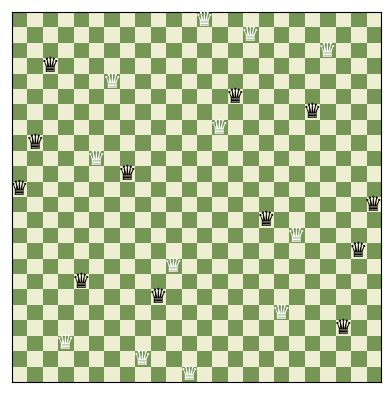

In [52]:
N = 24
solver = NQueen_sym90(N)
solver.solve_symmetric_nqueen()

print(len(solver.solutions))
for num in list(solver.solutions)[:10]:
    board = permutation2board(factoradic2permutation(decimal2factoradic(N, num)))
    plot_chess_board(np.asarray(board), fontsize=15)

In [44]:
def is_valid(board):
    N = len(board)
    rows = set()
    cols = set()
    diags = set()
    anti_diags = set()
    
    for i in range(N):
        for j in range(N):
            if board[i][j]:
                if i in rows or j in cols or j-i in diags or j+i in anti_diags: return False
                rows.add(i)
                cols.add(j)
                diags.add(j-i)
                anti_diags.add(j+i)
                
    return len(rows) == N

is_valid(board)

True

1 [(1, 1)]
4 [(1, 2), (2, 4), (3, 1), (4, 3)]
5 [(1, 2), (2, 4), (3, 1), (4, 3), (5, 5)]
6 [(1, 2), (2, 4), (3, 6), (4, 1), (5, 3), (6, 5)]
7 [(1, 2), (2, 4), (3, 6), (4, 1), (5, 3), (6, 5), (7, 7)]
10 [(1, 2), (2, 4), (3, 6), (4, 8), (5, 10), (6, 1), (7, 3), (8, 5), (9, 7), (10, 9)]
11 [(1, 2), (2, 4), (3, 6), (4, 8), (5, 10), (6, 1), (7, 3), (8, 5), (9, 7), (10, 9), (11, 11)]
12 [(1, 2), (2, 4), (3, 6), (4, 8), (5, 10), (6, 12), (7, 1), (8, 3), (9, 5), (10, 7), (11, 9), (12, 11)]
13 [(1, 2), (2, 4), (3, 6), (4, 8), (5, 10), (6, 12), (7, 1), (8, 3), (9, 5), (10, 7), (11, 9), (12, 11), (13, 13)]
16 [(1, 2), (2, 4), (3, 6), (4, 8), (5, 10), (6, 12), (7, 14), (8, 16), (9, 1), (10, 3), (11, 5), (12, 7), (13, 9), (14, 11), (15, 13), (16, 15)]
17 [(1, 2), (2, 4), (3, 6), (4, 8), (5, 10), (6, 12), (7, 14), (8, 16), (9, 1), (10, 3), (11, 5), (12, 7), (13, 9), (14, 11), (15, 13), (16, 15), (17, 17)]
18 [(1, 2), (2, 4), (3, 6), (4, 8), (5, 10), (6, 12), (7, 14), (8, 16), (9, 18), (10, 1), (11, 

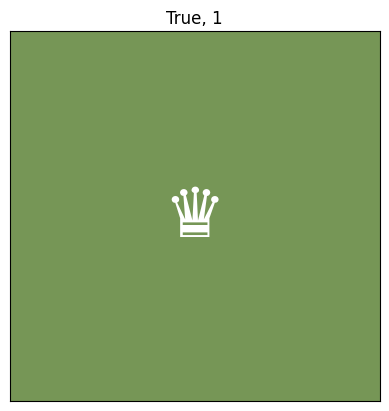

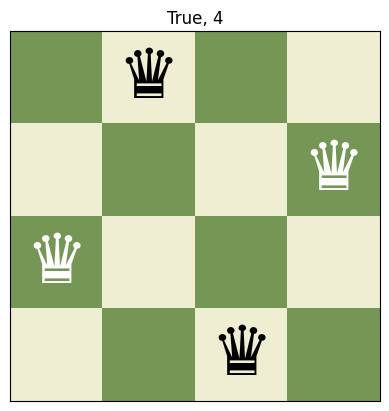

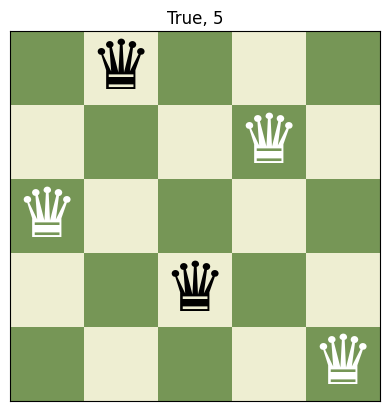

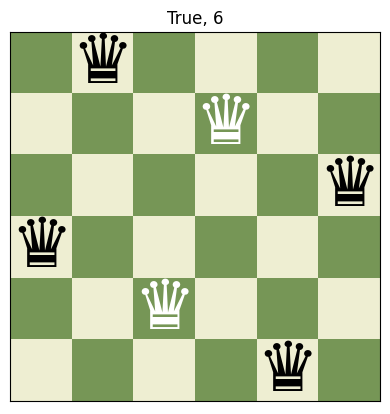

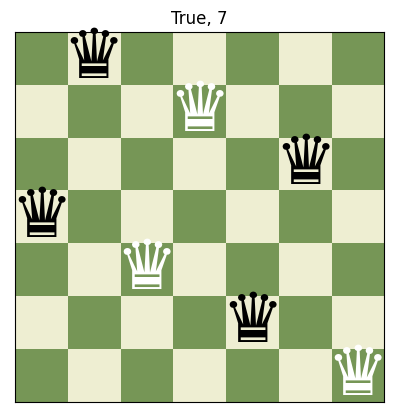

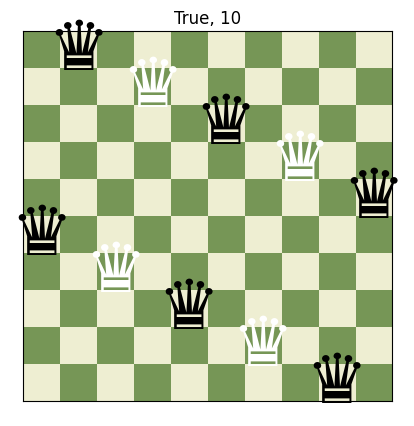

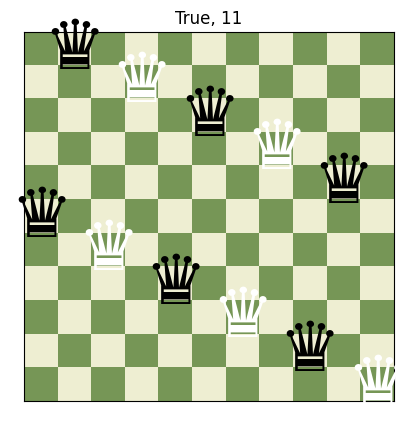

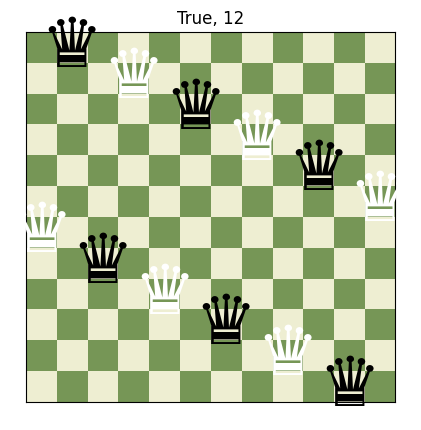

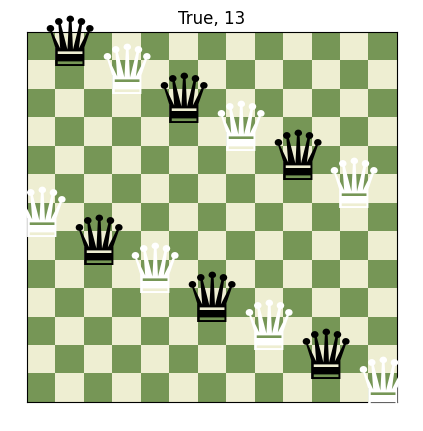

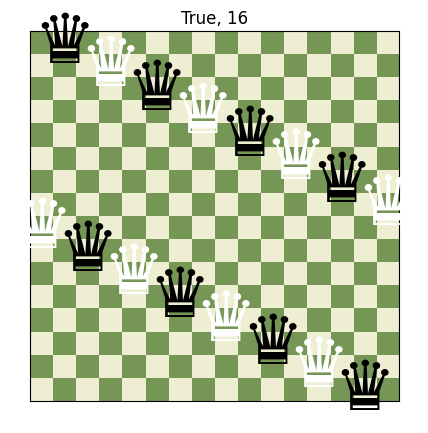

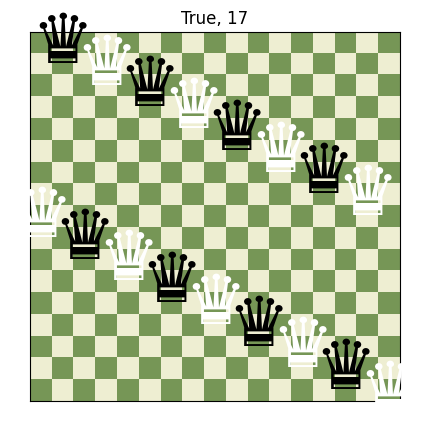

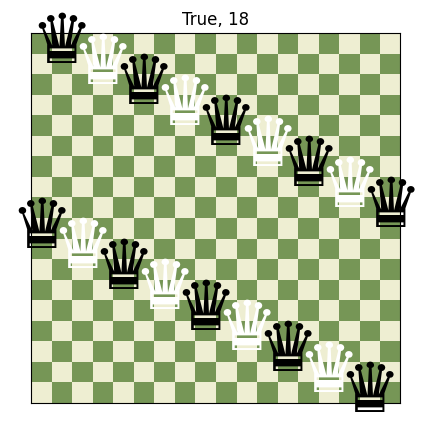

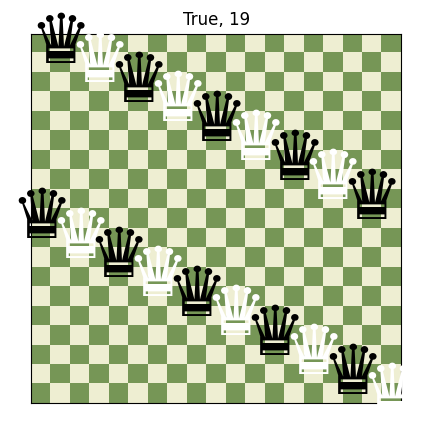

In [45]:
def construct_preplacements(m):
    even = [(i,2*i) for i in range(1,m//2 + 1)]
    odd = [(i, 2*(i-m//2) - 1) for i in range(m//2+1, m+1)]
    return even + odd

for m in range(1,20):
    if m % 6 in {2,3}: continue
    S = construct_preplacements(m)
    board = [[0]*m for _ in range(m)]
    print(m,S)
    for i,j in S:
        board[i-1][j-1] = 1
        
    plot_chess_board(np.array(board))
    plt.title(str(is_valid(board)) + f", {m}")

# $r^2$ symmetry

In [47]:
# import time

# class NQueen_sym180:
#     def __init__(self, N):
#         self.N = N
#         self.solutions = set()
#         self.board = [[0]*N for _ in range(N)]

#     def solve_symmetric_nqueen(self, num_placed=0, row=0, rows=set(), cols=set(), diags=set(), anti_diags=set()):
#         if num_placed == self.N:
#             return self.solutions.add(factoradic2decimal(permutation2factoradic(board2permutation(self.board))))

#         if row in rows:
#             return self.solve_symmetric_nqueen(num_placed, row+1, rows, cols, diags, anti_diags)

#         for col in range(self.N):
#             if col in cols or (col - row) in diags or (col + row) in anti_diags: continue
#             overlap = self._add_to_sets(row,col,rows,cols,diags,anti_diags)
#             self._add_to_board(row,col)
            
#             if not overlap:
#                 self.solve_symmetric_nqueen(num_placed+4, row+1, rows, cols, diags, anti_diags)

#             self._remove_from_board(row,col)
#             self._remove_from_sets(row,col,rows,cols,diags,anti_diags)
            
#     def _add_to_sets(self, row, col, rows, cols, diags, anti_diags):
#         _rows = [row, self.N-1-row]
#         _cols = [col, self.N-1-col]

#         for i,j in zip(_rows,_cols):
#             if i in rows or j in cols or j-i in diags or j+i in anti_diags: return True # overlap is true
#             rows.add(i)
#             cols.add(j)
#             diags.add(j-i)
#             anti_diags.add(j+i)
#         return False # overlap is false

#     def _remove_from_sets(self, row, col, rows, cols, diags, anti_diags):
#         _rows = [row, self.N-1-row]
#         _cols = [col, self.N-1-col]
#         for i,j in zip(_rows, _cols):
#             if i in rows: rows.remove(i)
#             if j in cols: cols.remove(j)
#             if j-i in diags: diags.remove(j-i)
#             if j+i in anti_diags: anti_diags.remove(j+i)

#     def _add_to_board(self, row, col):
#         _rows = [row, self.N-1-row]
#         _cols = [col, self.N-1-col]
#         for i,j in zip(_rows, _cols):
#             self.board[i][j] = 1
            
#     def _remove_from_board(self, row, col):
#         _rows = [row, self.N-1-row]
#         _cols = [col, self.N-1-col]
#         for i,j in zip(_rows, _cols):
#             self.board[i][j] = 0
            

# for N in range(1, 28+1):
#     print("-"*100)
#     print(f"N = {N}")
#     solver = NQueen_sym180(N)
#     start_time = time.time()
#     if N%2 == 0:
#         solver.solve_symmetric_nqueen()
#     else:
#         solver.board[N//2][N//2] = 1
#         solver.solve_symmetric_nqueen(1,0,set([(N-1)//2]),set([(N-1)//2]),set([0]),set([N-1]))
#     result = len(solver.solutions)
    
#     print(result, "#"*4, time.time() - start_time)
#     factors = factorint(result)
#     print([v for row in [[factor]*power for (factor, power) in factors.items()] for v in row])